# Multimodal LLM Demo: BLIP-2 + Flan-T5 on Sign Language Frame

This notebook demonstrates a zero-shot prompt-based gloss prediction from a single sign language video frame using BLIP-2 with Flan-T5.


In [11]:
from google.colab import drive
drive.mount('/content/drive')

#!pip install -q transformers opencv-python Pillow

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import cv2
import torch
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration


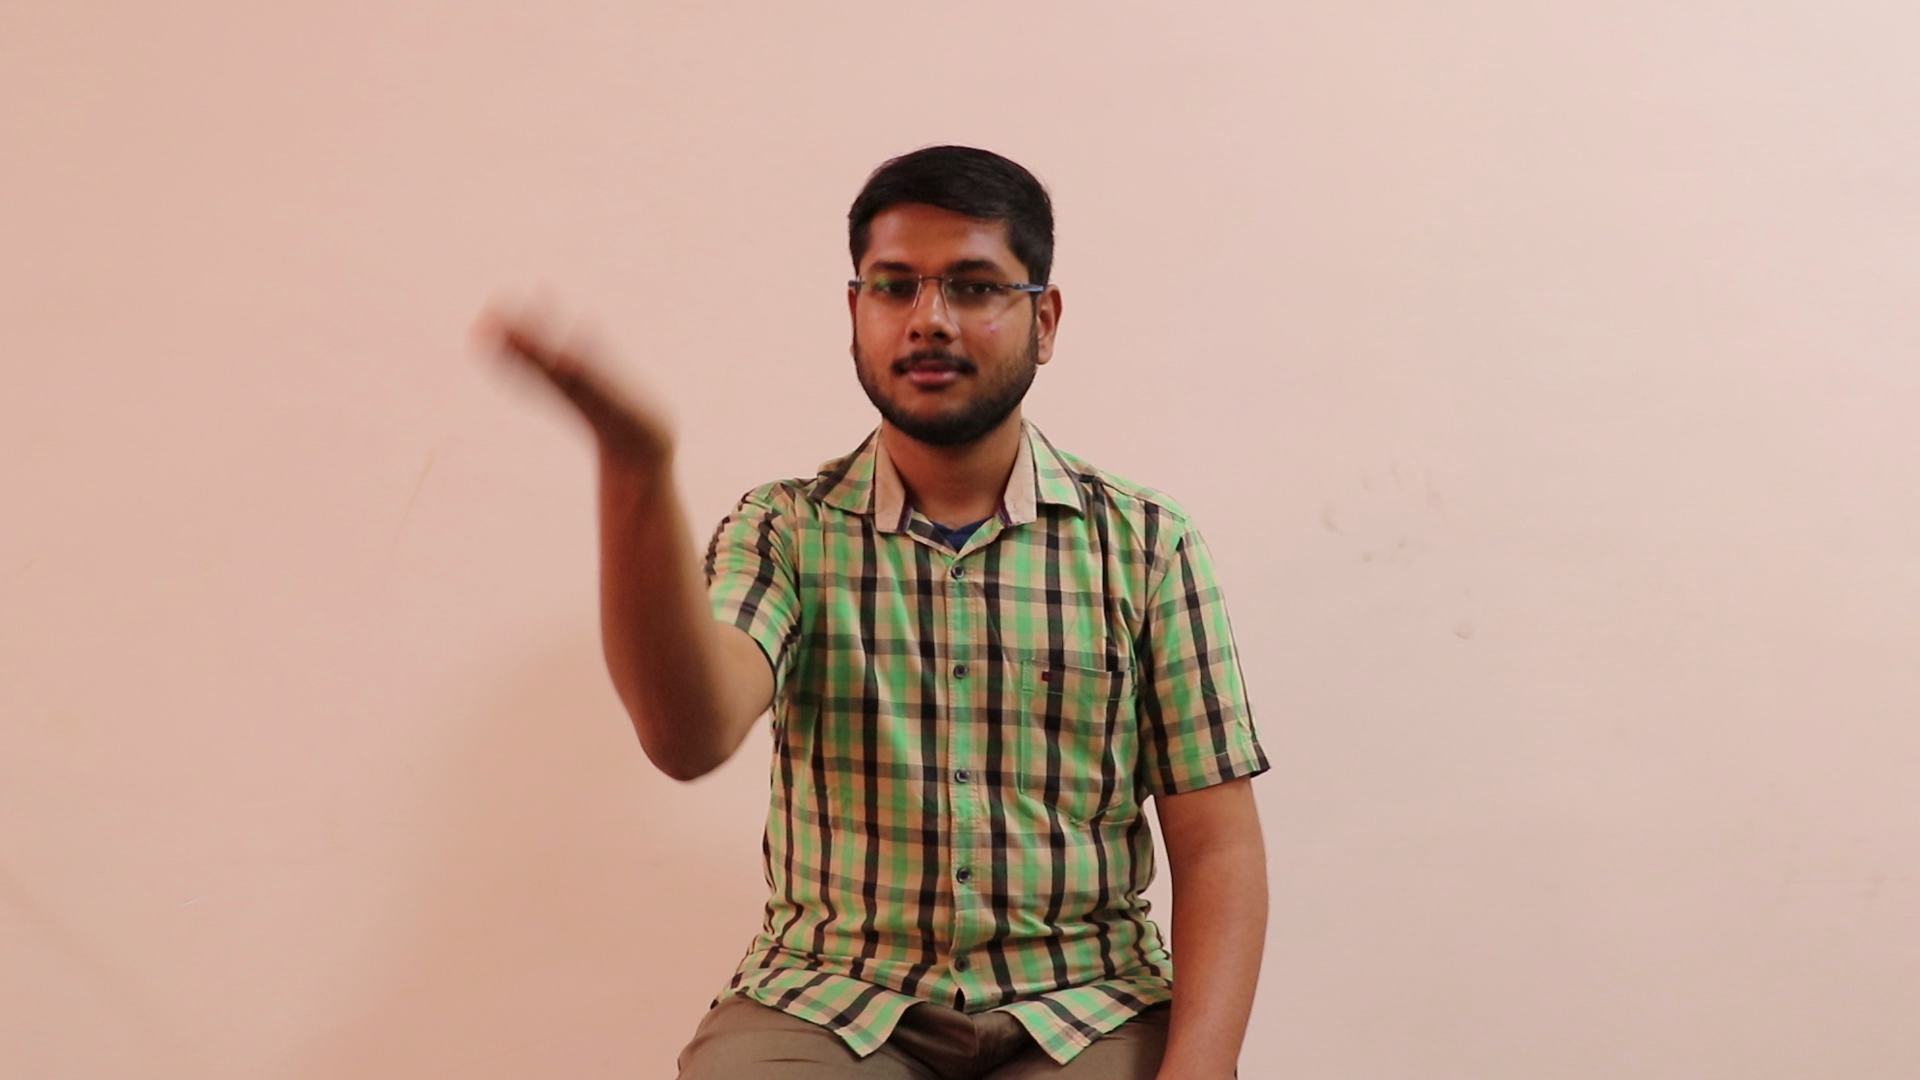

In [13]:
# Load video and extract middle frame
video_path = "/content/drive/MyDrive/IETGenAI-SLT/Chapter 3/Sample Videos/bring water for me (1).MP4"
cap = cv2.VideoCapture(video_path)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
mid_frame_idx = frame_count // 2
cap.set(cv2.CAP_PROP_POS_FRAMES, mid_frame_idx)
ret, frame = cap.read()
cap.release()

if ret:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(frame_rgb)
    image.save("extracted_frame.jpg")
    display(image)
else:
    print("Failed to extract frame.")


In [14]:
# Run prediction
prompt = "What is the signer doing?"
inputs = processor(images=image, text=prompt, return_tensors="pt").to(device, torch.float16)
output = model.generate(**inputs, max_new_tokens=50)
generated_text = processor.decode(output[0], skip_special_tokens=True)

print("🔍 Prompt:", prompt)
print("📝 Model Output:", generated_text)

🔍 Prompt: What is the signer doing?
📝 Model Output: What is the signer doing?



## 🧠 Observations

- The model attempts to describe the sign based on a single frame.
- Since BLIP-2 is trained on natural image-caption pairs, it may interpret visual cues loosely.
- Can be extended with gloss supervision or multiple frames for better accuracy.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# !pip install -q transformers opencv-python Pillow

import cv2
import torch
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration

# Load video and extract middle frame
video_path = "/content/drive/MyDrive/IETGenAI-SLT/Chapter 3/Sample Videos/bring water for me (1).MP4"
cap = cv2.VideoCapture(video_path)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
mid_frame_idx = frame_count // 2
cap.set(cv2.CAP_PROP_POS_FRAMES, mid_frame_idx)
ret, frame = cap.read()
cap.release()

if ret:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(frame_rgb)
    image.save("extracted_frame.jpg")
    display(image)
else:
    print("Failed to extract frame.")

# Run prediction
# prompt = "What is the signer doing?"
# inputs = processor(images=image, text=prompt, return_tensors="pt").to(device, torch.float16)
# output = model.generate(**inputs, max_new_tokens=50)
# generated_text = processor.decode(output[0], skip_special_tokens=True)

# print("🔍 Prompt:", prompt)
# print("📝 Model Output:", generated_text)